# Mango DMC data set
## Summary and preparation

Anderson, N. T., Walsh, K. B., Subedi, P. P., & Hayes, C. H. (2020). Achieving robustness across season, location and cultivar for a NIRS model for intact mango fruit dry matter content. Postharvest Biology and Technology, 168, 111202.

https://data.mendeley.com/datasets/46htwnp833/2

### Load modules

In [19]:
# --- system modules

import sys
import datetime
import os


# --- numerical modules

import numpy as np
import pandas as pd


# --- model building

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# --- diPLS

import functions as fct
import dipals as ml
import utils 


# --- visualization and data modules
import matplotlib as mtply
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


plt.style.use("ggplot")
plt.rcParams.update({'font.size': 20})

### Load data

In [20]:
data_url = "NAnderson2020MendeleyMangoNIRData.csv"

data_raw = pd.read_csv(data_url,sep = ",", decimal = ".")
data_raw.describe(include = 'all')

Set        Season Region        Date        Type Cultivar  \
count   11691  11691.000000  11691       11691       11691    11691   
unique      3           NaN      2          46           2       10   
top       Cal           NaN     NT  23/10/2017  Hard Green     Caly   
freq     7413           NaN   8141        1198        9711     3460   
mean      NaN      2.337696    NaN         NaN         NaN      NaN   
std       NaN      1.068196    NaN         NaN         NaN      NaN   
min       NaN      1.000000    NaN         NaN         NaN      NaN   
25%       NaN      1.000000    NaN         NaN         NaN      NaN   
50%       NaN      3.000000    NaN         NaN         NaN      NaN   
75%       NaN      3.000000    NaN         NaN         NaN      NaN   
max       NaN      4.000000    NaN         NaN         NaN      NaN   

                 Pop   Temp            DM      285  ...     1173     1176  \
count   11691.000000  11691  11691.000000  11691.0  ...  11691.0  11691.0   
unique           NaN      4           NaN      NaN  ...      NaN      NaN   
top              NaN     No           NaN      NaN  ...      NaN      NaN   
freq             NaN   7318           NaN      NaN  ...      NaN      NaN   
mean       49.379608    NaN     16.282835      0.0  ...      0.0      0.0   
std        33.796239    NaN      2.459531      0.0  ...      0.0      0.0   
min         1.000000    NaN      9.464606      0.0  ...      0.0      0.0   
25%        14.000000    NaN     14.332756      0.0  ...      0.0      0.0   
50%        52.000000    NaN     16.301700      0.0  ...      0.0      0.0   
75%        76.000000    NaN     18.112985      0.0  ...      0.0      0.0   
max       112.000000    NaN     24.577150      0.0  ...      0.0      0.0   

           1179     1182     1185     1188     1191     1194     1197     1200  
count   11691.0  11691.0  11691.0  11691.0  11691.0  11691.0  11691.0  11691.0  
unique      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
top         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
freq        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
mean        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
std         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
min         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
25%         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
50%         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
75%         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
max         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[11 rows x 315 columns]

In [21]:
# checking nan values
data_raw.isna().sum().sum()

0

In [22]:
pd.crosstab([data_raw.Region,data_raw.Type, data_raw.Season, data_raw.Cultivar], 
                             data_raw.Set, margins = False)

Set                                 Cal  Tuning  Val Ext
Region Type       Season Cultivar                       
NT     Hard Green 1      Caly      1277     158        0
                         HG         293     276        0
                         KP        1059       0        0
                  2      Caly       300      80        0
                         HG           0      88        0
                         KP         340      92        0
                         R2E2       276      10        0
                  3      1201       318      80        0
                         1243       320      80        0
                         4069        80     320        0
                         Caly       156     164        0
                         HG          80      80        0
                         KP         216      80        0
                         LadyG      158     190        0
                         LadyJ      238     160        0
                         R2E2       156     236        0
                  4      Caly         0       0       80
                         KP           0       0       80
                         R2E2         0       0       80
       Ripen      3      KP          78       0        0
                  4      Caly         0       0      144
                         KP           0       0      158
                         R2E2         0       0      160
QLD    Hard Green 1      Caly       160      80        0
                         HG          80      80        0
                         KP          80      80        0
                         Keitt      211      80        0
                  2      Caly        40       0        0
                         HG          38       0        0
                         Keitt       40       0        0
                         R2E2        39      20        0
                  3      Caly       264       0        0
                         HG          80      80        0
                         KP         180       0        0
                         R2E2       158       0        0
                  4      Caly         0       0       80
                         HG           0       0       80
                         KP           0       0       80
                         R2E2         0       0       80
       Ripen      3      Caly       238      80        0
                         HG         226      78        0
                         KP           0      80        0
                         R2E2       234      78        0
                  4      Caly         0       0      159
                         HG           0       0      159
                         R2E2         0       0      108

### Specify source and target domains

Here the common cultivars for the 4 seasons are Caly, KP, HG, R2E2, therefore we keep those 4 cultivars. Cultivar Caly is kept in the source domain with season 1. The other cultivars are taken in the target domains for seasons 1,2 and 3. The test set is called "Val Ext" and it contains data of season 4 and we take all the other conditions.

In [23]:
sou_filter = (data_raw["Season"]==1) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "Caly")

tar_filters = []
tar_filters.append((data_raw["Season"]==1) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "KP"))
tar_filters.append((data_raw["Season"]==1) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "HG"))
tar_filters.append((data_raw["Season"]==2) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "KP"))
tar_filters.append((data_raw["Season"]==2) &  (data_raw["Set"] == "Tuning") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "HG"))
tar_filters.append((data_raw["Season"]==2) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "R2E2"))
tar_filters.append((data_raw["Season"]==3) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "KP"))
tar_filters.append((data_raw["Season"]==3) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "HG"))
tar_filters.append((data_raw["Season"]==3) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Hard Green") & (data_raw["Cultivar"] == "R2E2"))
tar_filters.append((data_raw["Season"]==3) &  (data_raw["Set"] == "Cal") & (data_raw["Region"] == "NT") & (data_raw["Type"] == "Ripen") & (data_raw["Cultivar"] == "KP"))


# season 4
tar_test_filter = (data_raw["Set"]=="Val Ext") & (data_raw["Region"] == "NT") & ((data_raw["Type"] == "Hard Green") | (data_raw["Type"] == "Ripen") ) & ((data_raw["Cultivar"] == "Caly") | (data_raw["Cultivar"] == "KP") | (data_raw["Cultivar"] == "HG") | (data_raw["Cultivar"] == "R2E2"))

# data sizes
#print(sou_filter.sum(), [tt_filter.sum() for tt_filter in tar_filters],tar_test_filter.sum())

In [24]:
# Get data sets for each domain
data_sou = data_raw.loc[sou_filter]
data_tar_list = []

for tt_filter in tar_filters:
    
    data_tar_list.append(data_raw.loc[tt_filter])
    
data_tar_test = data_raw.loc[tar_test_filter]

### Raw data and descriptive statistics

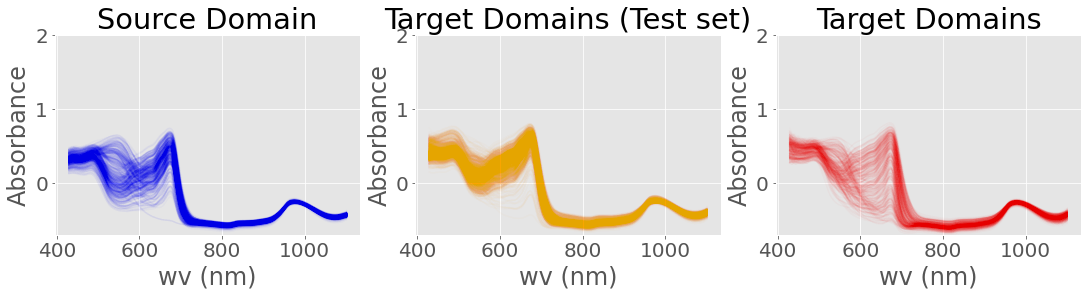

In [25]:
# Get matrices for each domain
wv_range_selected = np.arange(40,265) # 430-1100 nm
Xsou_cal = np.array(data_sou.iloc[:,17:-14])[:,wv_range_selected]
Ysou_cal = np.array(data_sou.iloc[:,8:9])

Xt_list_all = []

for data_tar in data_tar_list:
    
    Xt_list_all.append(np.array(data_tar.iloc[:,17:-14])[:,wv_range_selected])

    
Xtar_concat = np.concatenate(Xt_list_all, axis = 0) 
Xt_list = [Xtar_concat]
    
    
Xtar_test = np.array(data_tar_test.iloc[:,17:-14])[:,wv_range_selected]
Ytar_test = np.array(data_tar_test.iloc[:,8:9])


wv_range = np.array(data_sou.columns[17:-14]).astype(np.float64)[wv_range_selected]


# spectral signals from each domain

ymin = -0.7
ymax = 2


fig, axs = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)

axs[0].plot(wv_range,Xsou_cal.T,c="blue", alpha=0.01)
axs[0].set_ylim(ymin, ymax)
axs[0].set_title("Source Domain")
axs[0].set_xlabel("wv (nm)")
axs[0].set_ylabel("Absorbance")

axs[1].plot(wv_range,Xt_list[0].T,c="orange", alpha=0.01)
axs[1].set_ylim(ymin, ymax)
axs[1].set_title("Target Domains (Test set)")
axs[1].set_xlabel("wv (nm)")
axs[1].set_ylabel("Absorbance")

axs[2].plot(wv_range,Xtar_test.T,c="red", alpha=0.01)
axs[2].set_ylim(ymin, ymax)
axs[2].set_title("Target Domains")
axs[2].set_xlabel("wv (nm)")
axs[2].set_ylabel("Absorbance")


plt.show()

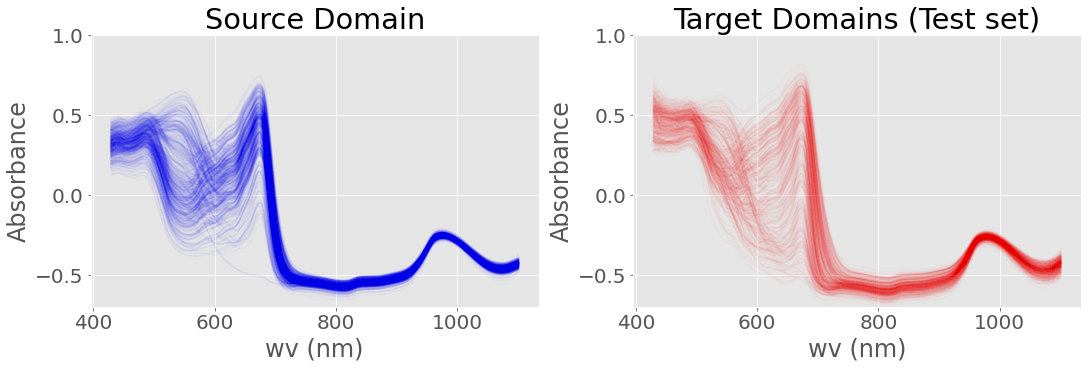

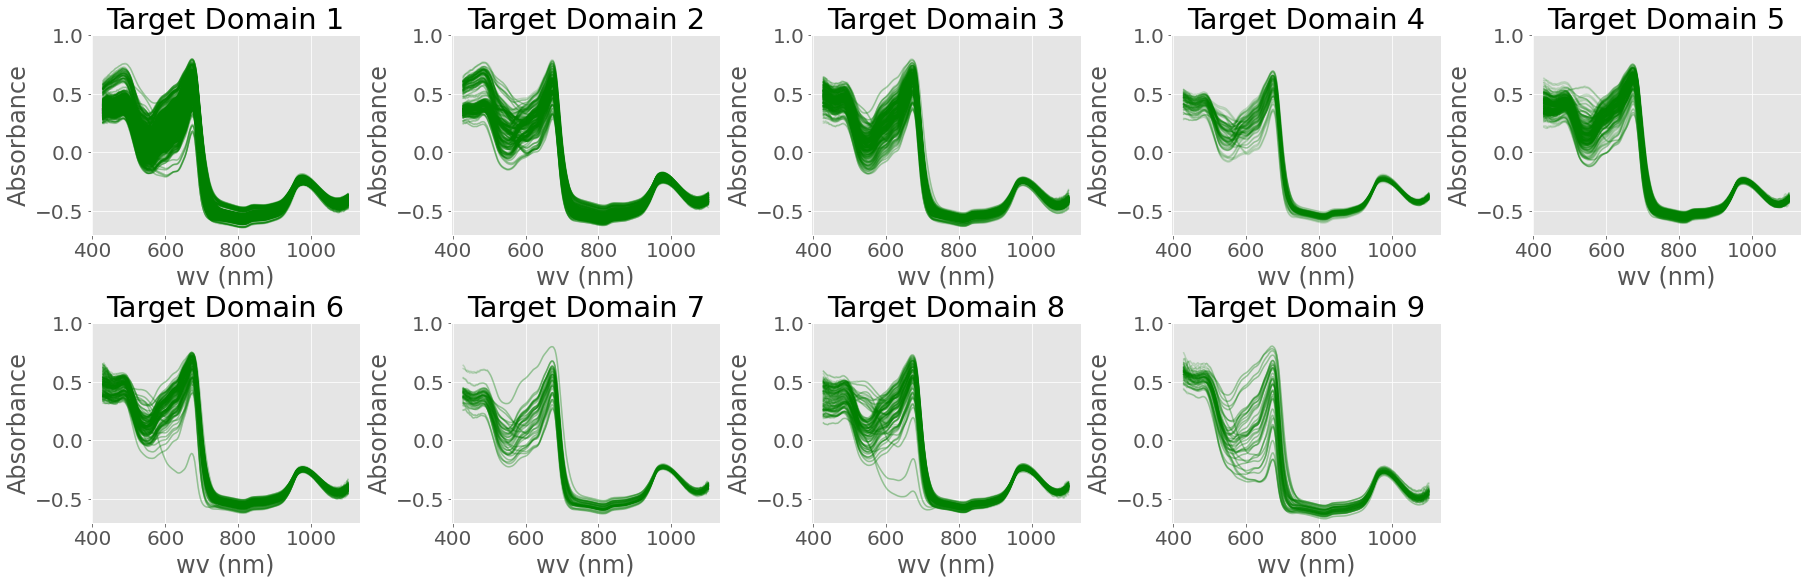

In [26]:
# Get matrices for each domain

wv_range_selected = np.arange(40,265) # 430-1100 nm

Xsou_cal = np.array(data_sou.iloc[:,17:-14])[:,wv_range_selected]
Ysou_cal = np.array(data_sou.iloc[:,8:9])

Xt_list = []

for data_tar in data_tar_list:
    
    Xt_list.append(np.array(data_tar.iloc[:,17:-14])[:,wv_range_selected])


Xtar_test = np.array(data_tar_test.iloc[:,17:-14])[:,wv_range_selected]
Ytar_test = np.array(data_tar_test.iloc[:,8:9])


wv_range = np.array(data_sou.columns[17:-14]).astype(np.float64)[wv_range_selected]


# spectral signals from each domain

ymin = -0.7
ymax = 1


fig, axs = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)

axs[0].plot(wv_range,Xsou_cal.T,c="b", alpha = 0.01)
axs[0].set_ylim(ymin, ymax)
axs[0].set_title("Source Domain")
axs[0].set_xlabel("wv (nm)")
axs[0].set_ylabel("Absorbance")

axs[1].plot(wv_range,Xtar_test.T,c="r", alpha = 0.01)
axs[1].set_ylim(ymin, ymax)
axs[1].set_title("Target Domains (Test set)")
axs[1].set_xlabel("wv (nm)")
axs[1].set_ylabel("Absorbance")

fig.savefig("../figures/mango_data_caltest.png")


plt.show()

fig, axs = plt.subplots(2, 5, figsize=(25,8), constrained_layout=True)
k = 0
for i in range(2):
    for j in range(5):        
        if k < 9:
            axs[i,j].plot(wv_range,Xt_list[k].T,c="g", alpha = 0.2)
            axs[i,j].set_ylim(ymin, ymax)
            axs[i,j].set_title("Target Domain {:d}".format(k+1))
            axs[i,j].set_xlabel("wv (nm)")
            axs[i,j].set_ylabel("Absorbance")
            
            k += 1


axs[-1,-1].axis('off')
fig.savefig("../figures/mango_data_mtdomains.png")

plt.show()




In [27]:
desc = {}

desc["wv_min"] = np.amin(wv_range)
desc["wv_max"] = np.amax(wv_range)
desc["source_mean"] = Ysou_cal.mean(axis=0) 
desc["source_std"] = Ysou_cal.std(axis=0) 
desc["target_test_mean"] = Ytar_test.mean(axis=0)
desc["target_test_std"] = Ytar_test.std(axis=0)

print(pd.DataFrame.from_dict(desc).to_latex())
pd.DataFrame.from_dict(desc)

\begin{tabular}{lrrrrrr}
\toprule
{} &  wv\_min &  wv\_max &  source\_mean &  source\_std &  target\_test\_mean &  target\_test\_std \\
\midrule
0 &   429.0 &  1101.0 &     16.20136 &    2.383931 &           17.7627 &           2.6694 \\
\bottomrule
\end{tabular}



wv_min  wv_max  source_mean  source_std  target_test_mean  target_test_std
0   429.0  1101.0     16.20136    2.383931           17.7627           2.6694

In [28]:
data_sou["Domain"] = "Source"

for i,data_tar in enumerate(data_tar_list):
    
    data_tar["Domain"] = "Target {}".format(i+1)
    
    data_tar_list[i] = data_tar

    
data_tar_test["Domain"] = "Target Domains Test Set"

all_data = [data_sou] + data_tar_list + [data_tar_test]

all_data_concat = pd.concat(all_data)


ctab = pd.crosstab([all_data_concat.Domain, all_data_concat.Type, all_data_concat.Cultivar], all_data_concat.Season, margins = False)

print(ctab.to_latex(index = True))

\begin{tabular}{lllrrrr}
\toprule
                        &       & Season &     1 &    2 &    3 &    4 \\
Domain & Type & Cultivar &       &      &      &      \\
\midrule
Source & Hard Green & Caly &  1277 &    0 &    0 &    0 \\
Target 1 & Hard Green & KP &  1059 &    0 &    0 &    0 \\
Target 2 & Hard Green & HG &   293 &    0 &    0 &    0 \\
Target 3 & Hard Green & KP &     0 &  340 &    0 &    0 \\
Target 4 & Hard Green & HG &     0 &   88 &    0 &    0 \\
Target 5 & Hard Green & R2E2 &     0 &  276 &    0 &    0 \\
Target 6 & Hard Green & KP &     0 &    0 &  216 &    0 \\
Target 7 & Hard Green & HG &     0 &    0 &   80 &    0 \\
Target 8 & Hard Green & R2E2 &     0 &    0 &  156 &    0 \\
Target 9 & Ripen & KP &     0 &    0 &   78 &    0 \\
Target Domains Test Set & Hard Green & Caly &     0 &    0 &    0 &   80 \\
                        &       & KP &     0 &    0 &    0 &   80 \\
                        &       & R2E2 &     0 &    0 &    0 &   80 \\
                      

### Principal component analysis (PCA)

[]

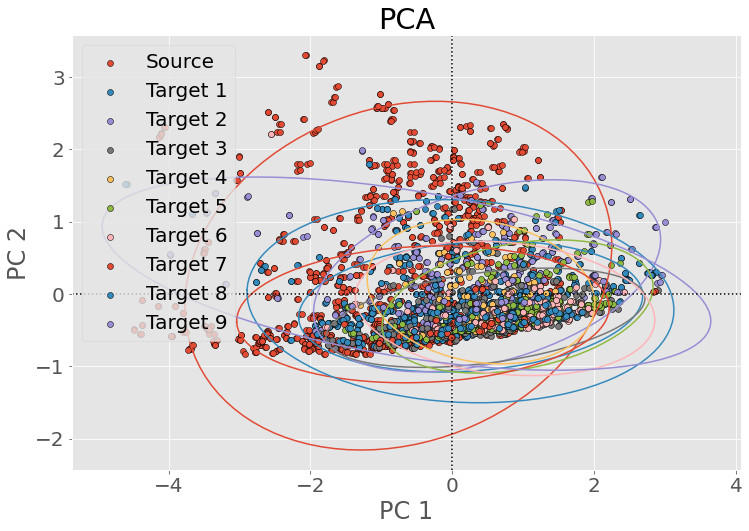

In [29]:
n_id = np.cumsum([0,Xsou_cal.shape[0]] + [xx.shape[0] for xx in Xt_list])
X_pca = np.vstack([Xsou_cal] + Xt_list)
X_pca = X_pca[:,...] - np.mean(X_pca,0)
U,S,V = np.linalg.svd(X_pca)

T = U[:, :20]@np.diag(S[:20])

figs = []
plt.figure(figsize=(12,8))

for i in range(n_id.shape[0]-1):

    rows = np.arange(n_id[i],n_id[i+1])
    a = plt.scatter(T[rows, 0], T[rows, 1], edgecolors='k')
    figs.append(a)
    el = fct.hellipse(T[rows, :2])
    plt.plot(el[0,:],el[1,:])


plt.xlabel('PC 1')
plt.ylabel('PC 2')

ax = plt.gca()
ax.axhline(y=0,color='k',linestyle=':')
ax.axvline(x=0,color='k',linestyle=':')

plt.legend(figs, ['Source'] + ["Target {:d}".format(k) for k in range(1,10)])
plt.title('PCA')

plt.plot()

In [30]:
all_data_concat_sel = all_data_concat.loc[:,["Domain","Type","Cultivar","Season","DM"]]

# ctab = pd.crosstab([all_data_concat.Domain, all_data_concat.Type, all_data_concat.Cultivar], all_data_concat.Season, margins = False)
data_domains = all_data_concat_sel.groupby(["Domain","Type","Cultivar","Season"])

data_domains_summary = data_domains.agg({"DM": ["size","mean","std"]}).reset_index()

data_domains_summary = data_domains.agg(DM_size=pd.NamedAgg(column="DM", aggfunc="size"),
DM_mean=pd.NamedAgg(column="DM", aggfunc="mean"),
DM_std=pd.NamedAgg(column="DM", aggfunc="std")).reset_index()

data_domains_summary["DM_mean"] = np.round(data_domains_summary["DM_mean"],2)
data_domains_summary["DM_std"] = np.round(data_domains_summary["DM_std"],2)

print(data_domains_summary.to_latex(index=None))

\begin{tabular}{lllrrrr}
\toprule
                  Domain &        Type & Cultivar &  Season &  DM\_size &  DM\_mean &  DM\_std \\
\midrule
                  Source &  Hard Green &     Caly &       1 &     1277 &    16.20 &    2.38 \\
                Target 1 &  Hard Green &       KP &       1 &     1059 &    17.07 &    2.80 \\
                Target 2 &  Hard Green &       HG &       1 &      293 &    18.23 &    2.02 \\
                Target 3 &  Hard Green &       KP &       2 &      340 &    15.48 &    1.93 \\
                Target 4 &  Hard Green &       HG &       2 &       88 &    17.04 &    1.38 \\
                Target 5 &  Hard Green &     R2E2 &       2 &      276 &    15.25 &    1.76 \\
                Target 6 &  Hard Green &       KP &       3 &      216 &    16.21 &    3.48 \\
                Target 7 &  Hard Green &       HG &       3 &       80 &    16.72 &    1.63 \\
                Target 8 &  Hard Green &     R2E2 &       3 &      156 &    14.71 &    1.65 \\
    